# Simple Linear Regression
1. **Regression** implies to predict continuous target value. 
2. **Linear Regression** implies to best-fit a linear equation through the given dataset. 
3. **Simple Linear Regression** uses 1 feature to best-fit a linear equation and predict continuous target variable

## Plan of action for this tutorial
1. Create a 2-variable dataset based on equation: 
   `y = x/2 + sin(x) + N(0,1)`
2. Visualize using plot to view above dataset
3. Divide the data into "attributes" and "labels"
4. Split the data into train, test datasets
5. Train a Simple Linear Regression model
6. Display the Linear equation used to predict target values
7. Evaluate the model on test dataset using RMSE (Root Mean Squared Error)

### Import required libraries

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

### 1. Create a dataset

In [56]:
SIZE = 100
X = np.arange(SIZE)
Y = X/2 + np.sin(X) + np.random.randint(low=0, high=10, size=SIZE)
df = pd.DataFrame({'feature_1': X, 'Target': Y})

In [57]:
df.shape

(100, 2)

In [58]:
df.describe()

,feature_1,Target
count,100.000000,100.000000
mean,49.500000,29.313792
std,29.011492,15.311168
min,0.000000,0.000000
25%,24.750000,17.299342
50%,49.500000,30.947330
75%,74.250000,41.654619
max,99.000000,57.500793


In [59]:
df.head()

,feature_1,Target
0,0,0.000000
1,1,8.341471
2,2,1.909297
3,3,2.641120
4,4,9.243198


### 2. Visualize the dataset

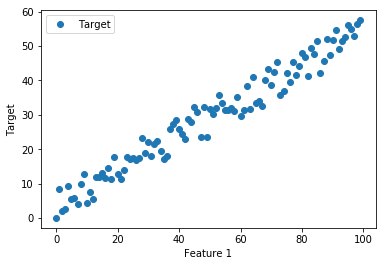

In [60]:
df.plot(x='feature_1',y='Target', style='o')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.show()

C:\Users\Peeush Agarwal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


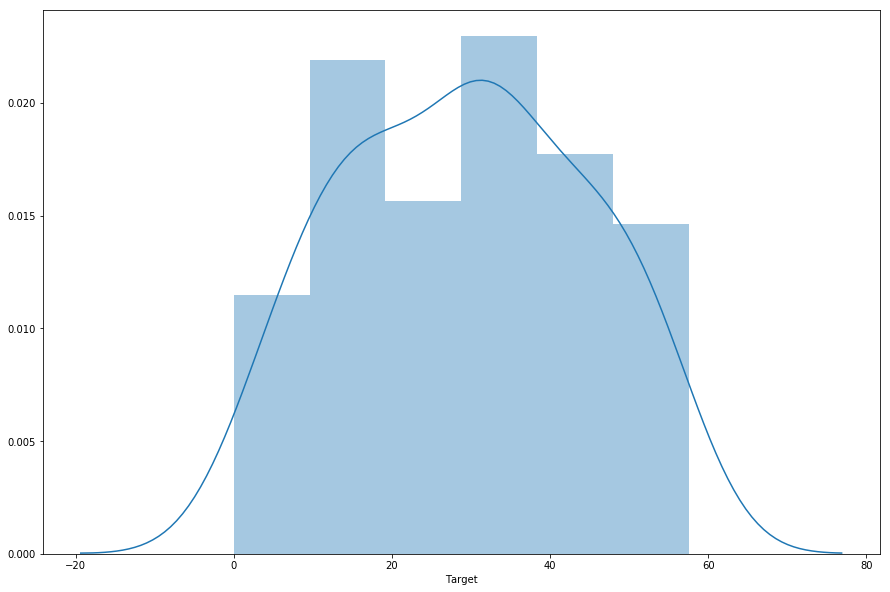

In [61]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['Target'])

### 3. Divide the data into "attributes" and "labels"

In [63]:
X = df['feature_1'].values.reshape(-1,1)
Y = df['Target'].values.reshape(-1,1)

### 4. Split the data into train, test datasets

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [69]:
print('X train: ', X_train.shape)
print('X test: ', X_test.shape)
print('Y train: ', Y_train.shape)
print('Y test: ', Y_test.shape)

X train:  (80, 1)
X test:  (20, 1)
Y train:  (80, 1)
Y test:  (20, 1)


### 5. Train a Simple Linear Regression model

In [70]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 6. Display the Linear equation used to predict target values

In [73]:
print('Linear Equation is: ')
print('y = {0}x + {1}'.format(model.coef_[0][0],model.intercept_[0]))

Linear Equation is: 
y = 0.5219089206296103x + 3.5568512805441124


### 7. Evaluate the model

In [76]:
Y_predict = model.predict(X_test)

In [83]:
mean_error = metrics.mean_absolute_error(Y_test, Y_predict)
print('Mean error: ', mean_error)

Mean error:  2.2667194605758434


In [84]:
mse = metrics.mean_squared_error(Y_test, Y_predict)
print('Mean Squared Error(MSE): ', mse)

Mean Squared Error(MSE):  8.006724267252919


In [82]:
rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))
print('Root Mean Squared Error(RMSE): ', rmse)

Root Mean Squared Error(RMSE):  2.829615568810173


Average target value: 29.314
RMSE: 2.83
Comparing both, it seems that our model is accurate. 

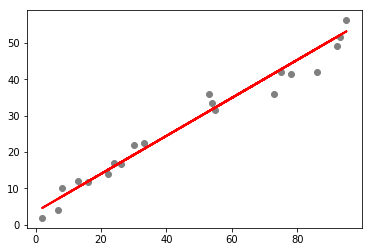

In [81]:
plt.scatter(X_test, Y_test, color='gray')
plt.plot(X_test, Y_predict, color='red', linewidth=2)
plt.show()